In [2]:
#!pip install kagglehub
import kagglehub
import os
import shutil
from urllib.request import urlretrieve
import numpy as np
import pandas as pd


## Download and unpack data properly

In [2]:
def download_movielens():
    permalink = "https://files.grouplens.org/datasets/movielens/ml-32m.zip"

    # Download the dataset
    urlretrieve(permalink, "movielens.zip")

    # Unzip the dataset
    shutil.unpack_archive("movielens.zip", "data/")

    os.remove("movielens.zip")

def download_imdb():
    path = kagglehub.dataset_download("ashishjangra27/imdb-movies-dataset")
    shutil.move(path, "data/imdb/")

#download_movielens()
#download_imdb()

## Load data and merge dataframes

In [3]:
def load_data():
    # Contains movieId, title, genres   
    ml_movies = pd.read_csv('data/ml-32m/movies.csv')
    
    # Contains userId, movieId, rating, timestamp
    ml_ratings = pd.read_csv('data/ml-32m/ratings.csv')
    
    # Contains userId, movieId, tag, timestamp
    ml_tags = pd.read_csv('data/ml-32m/tags.csv')

    # Contains movieId, imdbId, tmdbId
    ml_links = pd.read_csv('data/ml-32m/links.csv')

    # IMDB Dataset:
    imdb = pd.read_csv('data/imdb/movies.csv')

    return ml_movies, ml_ratings, ml_tags, ml_links, imdb

ml_movies, ml_ratings, ml_tags, ml_links, imdb = load_data()

C:\Users\khali\AppData\Local\Temp\ipykernel_14132\683732697.py:15: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb = pd.read_csv('data/imdb/movies.csv')


In [4]:
# Preprocessing IMDB:

#drop if description is "Add a plot" because we have no description then
imdb_descriptions = imdb[imdb['description'] != "Add a Plot"]

imdb_descriptions['id'] = imdb_descriptions['id'].str[2:]
imdb_descriptions['id'] = pd.to_numeric(imdb_descriptions['id'], errors='coerce')

#keep what we need
imdb_descriptions = imdb_descriptions[['id', 'description']]

#merge them, so we have a li nk between the two datasets
merged_links = ml_links.merge(imdb_descriptions, left_on='imdbId', right_on='id', how='inner').dropna(subset=['id'])

C:\Users\khali\AppData\Local\Temp\ipykernel_14132\493108502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_descriptions['id'] = imdb_descriptions['id'].str[2:]
C:\Users\khali\AppData\Local\Temp\ipykernel_14132\493108502.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_descriptions['id'] = pd.to_numeric(imdb_descriptions['id'], errors='coerce')


In [5]:
#merge the movies with the descriptions if that is what we want
ml_movies_description = ml_movies.merge(merged_links, left_on='movieId', right_on='movieId', how='inner')

ml_movies_description
#ml_movies_description.to_csv('data/movies_with_description.csv', index=False)

,movieId,title,genres,imdbId,tmdbId,id,description
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,114709,A cowboy doll is profoundly threatened and jea...
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,113497,When two kids find and play a magical board ga...
2,6,Heat (1995),Action|Crime|Thriller,113277,949.0,113277,A group of high-end professional thieves start...
3,8,Tom and Huck (1995),Adventure|Children,112302,45325.0,112302,Two best friends witness a murder and embark o...
4,9,Sudden Death (1995),Action,114576,9091.0,114576,A former fireman takes on a group of terrorist...
...,...,...,...,...,...,...,...
51855,292541,The Settlers (2023),Drama|Western,10370812,989589.0,10370812,"A mixed-race Chilean, rides south on an expedi..."
51856,292585,Night Crawlers (2009),Comedy|Horror,985060,147230.0,985060,Blood is thicker than water in this tiny Texas...
51857,292605,Our River... Our Sky (2023),Drama|War,10676126,855800.0,10676126,Baghdad. The last week of 2006. All over the c...
51858,292613,Freelance (2023),Action|Comedy,15744298,897087.0,15744298,An ex special forces operator takes a job to p...


## Data visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [19]:
ml_ratings

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [20]:
#count unique movies, users
print(ml_ratings['movieId'].nunique())
print(ml_ratings['userId'].nunique())


84432
200948


In [21]:
#imdb unique movies
print(imdb['id'].nunique())

2590932


In [22]:
genres = ml_movies_description['genres'].str.get_dummies()
movies_dummies = pd.concat([ml_movies_description, genres], axis=1)
movies_dummies.drop('genres', axis=1, inplace=True)
movies_dummies.head(1)

,movieId,title,imdbId,tmdbId,id,description,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),114709,862.0,114709,A cowboy doll is profoundly threatened and jea...,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
genre_counts = movies_dummies.drop(['movieId', 'title', 'imdbId','tmdbId', 'id', 'description'], axis=1).sum()

In [24]:
sorted = genre_counts.sort_values(ascending=False)

C:\Users\khali\AppData\Local\Temp\ipykernel_14132\1298435079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted.index, y=sorted.values, palette='viridis')


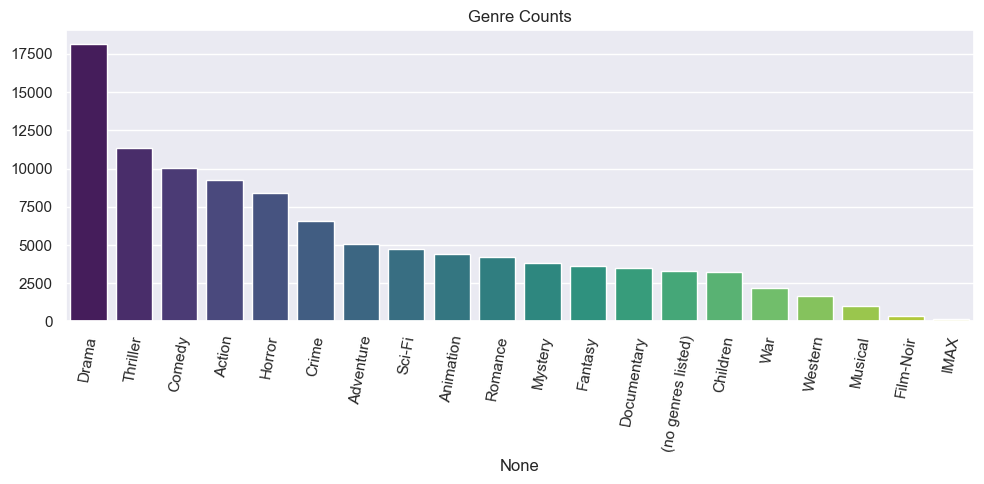

In [25]:
#barplot of genres

plt.figure(figsize=(10, 5))
sns.barplot(x=sorted.index, y=sorted.values, palette='viridis')
plt.title('Genre Counts')
plt.xticks(rotation=80)
plt.tight_layout()
#make it better for poster

plt.savefig('figs/ml_genre_counts.png')
plt.show()


In [26]:
#merge the ratings with the movies
ratings_with_description = ml_ratings.merge(ml_movies_description, left_on='movieId', right_on='movieId', how='inner')

In [27]:
# count unique movies, users, ratings
print(ratings_with_description['movieId'].nunique())
print(ratings_with_description['userId'].nunique())
print(len(ratings_with_description))

49892
200947
25723135


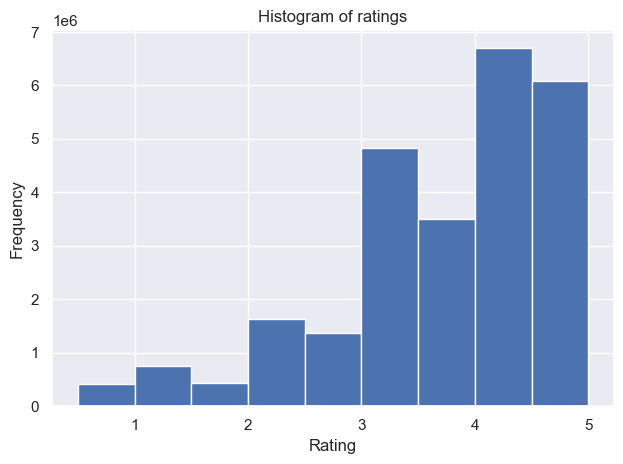

In [28]:
#histogram over ratings

plt.hist(ratings_with_description['rating'], bins=9)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of ratings')
plt.tight_layout()
plt.savefig('figs/histogram_ratings.png')
plt.show()


In [30]:
#save csv
ratings_with_description.to_csv('data/ratings_with_description.csv', index=False)